<a href="https://colab.research.google.com/github/JuanDaGue/GitHub/blob/master/Ps3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spiceypy

In [ ]:
import numpy as np
#import matplotlib.pylab as plt
import spiceypy as spy
from spiceypy import conics
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
#from meccel import *
#%matplotlib nbagg
##Tengo un problema con el mecel por eso tengo que importar cada libreria por aparte

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['spy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


##1. De vector de estado a elementos orbitales. 
Un satélite en órbita alrededor de la Tierra
tiene una posición instantánea $\vec{r} = 6045,0\hat{i}+ 3490,0\hat{j} + 0\hat{k}$ [km] y una velocidad $ \vec{v} = −2,457\hat i+
6,618\hat j+2,533\hat k$ [km/s]. Determine los elementos orbitales suponiendo que el plano fundamental es el ecuador terrestre.

In [ ]:
#Constantes
G=6.67e-11
ms=1.98e30
Mu=G*ms
#vectores 
r=np.array([6045.0,3490.0,0.0])# Posición[km]
v=np.array([-2.457,6.618,2.533]) # velocidad [km]/s

#momento angular especifico

hvec=np.cross(r,v)

#energia especifica

E=(np.linalg.norm(v)**2)/2.0+Mu/np.linalg.norm(r)

#vector lapace runge lentz y vector excentricidad

A=np.cross(v,h)-Mu*r/np.linalg.norm(r)
evec=A/Mu

print("momento angular especifico",hvec," cuya magnitud es ",np.linalg.norm(hvec),"km^2/s")
print("la energia especifica es %3.f"%E,"km^2/s^2")
print("El vector excentricidad",evec," cuya magnitud es ",np.linalg.norm(evec))

momento angular especifico [  8840.17  -15311.985  48580.74 ]  cuya magnitud es  51698.10237539406 km^2/s
la energia especifica es 18920295428396272 km^2/s^2
El vector excentricidad [-8.66030514e-01 -4.99991149e-01 -1.58123195e-16]  cuya magnitud es  0.9999999999999971


Ahora, es necesario recordar las expresiones siguientes
\begin{eqnarray}
\cos \Omega & = & \frac{\vec{n}\cdot \hat{a_x}}{n} = \frac{n_x}{n}\\
\cos \omega & = & \frac{\vec{n}\cdot \vec{e} }{ne} \\
\cos f & = & \frac{\vec{e}\cdot \vec{r}}{er} \\
\cos i & = & \frac{\vec{h}\cdot \hat{a_z}}{h} = \frac{h_z}{h}, \\
\end{eqnarray}

donde el vector $\vec{n}$ esta definido como


\begin{equation}
\displaystyle \vec{n} = \hat{a_z}\times \vec{h}
\end{equation}
 el cual apunta en la dirección de la línea de los nodos
medida respecto al punto vernal. 

In [ ]:
#Vectores unitarios
ax=np.array([1,0,0])
ay=np.array([0,1,0])
az=np.array([0,0,1])
            
#vector n

nvec=np.cross(az,h)
print("el vector del nodo es ",nvec)


el vector del nodo es  [15311.985  8840.17     -0.   ]


- **Longitud del nodo ascendente**. 
El criterio consiste en tomar la proyección 
del vector nodal $\vec{n}$ sobre el eje $y$ de manera que si el signo es
positivo, entonces el valor principal es el valor correcto. Si es negativo, el
valor de $\Omega$ se obtiene restando el valor principal de $2\pi$. 

\begin{eqnarray}
\Omega & = & \cos^{-1}\left(\frac{\vec{n}\cdot \hat{i}}{n} \right) \hspace{0.3cm} \text{sii } \vec{n}\cdot \hat{j} = n_y \geq 0\\
& = & 2\pi - \cos^{-1}\left(\frac{\vec{n}\cdot \hat{i}}{n} \right) \hspace{0.3cm} \text{sii } \vec{n}\cdot \hat{j} = n_y < 0 
\end{eqnarray}

In [ ]:
Omega=np.arccos((np.dot(nvec,ax))/np.linalg.norm(nvec))


if np.dot(nvec,ay)>=0:
  
  print(Omega)
else:
  Omega=2*np.pi-Omega
  print("La lonngitud del nodo ascendente es",Omega*(180/np.pi))


0.5235885550353486


- **Argumento del periapsis**. De nuevo, es necesario un criterio
para concer el cuadrante correcto de $\omega$. En este caso analizamos
la proyección del vector de excentricidad sobre el eje $z$. 

\begin{eqnarray}
\omega & = & \cos^{-1}\left(\frac{\vec{n}\cdot \vec{e}}{ne} \right) \hspace{0.3cm} \text{sii } \vec{e}\cdot \hat{k} = e_z \geq 0\\
& = & 2\pi - \cos^{-1}\left(\frac{\vec{n}\cdot \vec{e}}{ne} \right) \hspace{0.3cm} \text{sii } \vec{e}\cdot \hat{k} = e_z < 0 
\end{eqnarray}

In [ ]:
omega=np.arccos((np.dot(nvec,evec))/(np.linalg.norm(nvec))*np.linalg.norm(evec))


if np.dot(evec,az)>=0:
  
  print(omega)
else:
  omega=2*np.pi-omega
  print("El argumento del pariabsis es",omega*(180/np.pi))
  

El argumento del pariabsis es 180.00000627392936


- **Anomalia verdadera**. El criterio para decidir
el cuadrante depende de si el cuerpo se aleja del periapsis o si se acerca al periapsis. Para esto necesitamos conocer el signo de la taza de cambio de la variable radial. Notemos que

    $$
    v_r = \frac{\vec{r}\cdot \vec{v}}{r}
    $$

    Para una órbita elíptica, si el cuerpo se aleja del periáspsis $v_r > 0$
    y si se acerca al periápsis $v_r < 0$.
    
    Finalmente, el criterio para seleccionar el cuadrante de $f$ es

    \begin{eqnarray}
    f & = & \cos^{-1}\left(\frac{\vec{e}\cdot \vec{r}}{er} \right) \hspace{0.3cm} \text{sii } v_r \geq 0\\
    f & = & 2\pi - \cos^{-1}\left(\frac{\vec{e}\cdot \vec{r}}{er} \right) \hspace{0.3cm} \text{sii } v_r < 0 
    \end{eqnarray}

In [ ]:
#velocidad radial
vr=np.dot(r,v)/np.linalg.norm(r)
if vr>=0:
  
  print("El cuerpo se aleja del periabsis con una velocidad radial de",vr)
else:
  print("El cuerpo se acerca al periabsis con una velocidad radial de",vr)
  
#anomalia verdadera
f=np.arccos((np.dot(evec,r))/(np.linalg.norm(evec)*np.linalg.norm(r)))

if vr>=0:
  print("El argumento del pariabsis es",f*(180/np.pi))
else:
  f=2*np.pi-f
  print("El argumento del pariabsis es",f*(180/np.pi))

El cuerpo se aleja del periabsis con una velocidad radial de 1.1811044491923197
El argumento del pariabsis es 180.0


- **Inclinación**. No hay ambiguedad en la determinación ya que 
$0º\leq i <180º$. Si $90º < i < \leq 180º$ la órbita es retrógrada

In [ ]:
i=np.arccos((np.dot(hvec,az))/(np.linalg.norm(hvec)))
print("la nclinacion es",i*(180/np.pi))

la nclinacion es 19.9986562048433


##2. Satélite en órbita.
Un satélite en órbita elíptica alrededor de la Tierra tiene un período de $15,7430$ horas y una distancia al perigeo de $12756,0 $ km (respecto al centro de la Tierra). En
$t = 10$ horas después del paso por el perigeo calcule:



**a)La distancia radial.**

**Sln:**
>**Datos:**

> $T= 15,7430\, h= 566674.8 \, s$ "*Periodo*"

>$q=12756,0  \,km$"*Perigeo*"

>$Mt=5.97\times10^{24} \,kg$ "*masa de la Tierra*"

>$M_l=7.35\times10^{22}\, kg$ "*masa de la Luna*"

>$\mu=G(M_t+m_l)=4.03\times10^{14}$

> $\eta^2=\left(\dfrac{2\pi}{T}\right)^2=1.22\times10^{-8}\,s^{-1}$



Para encontrar la distancia radial es necesario conocer la anomalía verdadera $f$ o la anomalía excéntrica $E$ en $t=10$
\begin{align}
&r=\dfrac{P}{1+e\cos(f)}\qquad&(2.1)\\
&r=a(1-ecos(E))\qquad&(2.2)
\end{align}
la anomalía excéntrica se puede optener de las ecuaciones de Kepler
\begin{eqnarray}
(t-t_p)\eta=E-e\sin{E}
\end{eqnarray}
donde $a$ se puede allar del corolario de Newton.
$$a=\left(\frac{\mu}{\eta ^2}\right)^{\frac{1}{3}}=3.20\times10^{7}\, m$$
$a$ es el semieje mayor de la orbita, y este esta relacionado con el perigeo de la siguiente manera.
\begin{align}
&a=q/(1-e)\\
\textit{Despejando $e$ se obtine}\qquad& e=1-\frac{q}{a}\\
&e=0.60
\end{align}

Con el valor de la excentriciad es posible encontrar el valor de la anomalia excentrica $E$ udando metodos númericos
$$E=M+e\sin(E)$$
Con $M=(t-t_p)\eta=43.976$

Por tanto $E=4.001=229.29°$

Reemplazando $E$en la ecuacion (2.2) se optiene  $r=4.45\times10^7\mbox{m}$





**b) La velocidad.**
La velocidad se puede encontrar apartir de la *vis-viva*
$$v^2=\mu\left(\frac{2}{r}-\frac{1}{a}\right)=4.03×10^{14}\left(\frac{2}{4.45\times10^7}-\frac{1}{3.20\times10^7}\right)=5509332.188\,\mbox{m}^2/\mbox{s}^2$$
con esto $v=2347.19\mbox{m}/\mbox{s}$

**c) La componente radial de la velocidad.**
Esta componente se puede hallar si se encuentra el angulo de la velocidad $\phi$ con el eje $x$, usando la sigueinte expresión
$$v_r=v\cos{\phi}$$
Recordadndo que la magnitud de $h$ es $\left | \vec{h} \right |=\left | \vec{r}\times\vec{v} \right | =rv\sin \phi$, con $\phi$ el agulo entre
$\vec{v}$ y $\vec{r}$
\begin{eqnarray}
\sin \phi=\frac{h}{rv}\qquad(2.4)
\end{eqnarray}
 Es posible hallar $h$, usando la ley de las areas

\begin{eqnarray}
\Delta A=\frac{h}{2}\Delta T\\
\end{eqnarray}

En una vuelta completa $\Delta A=\pi ab$ es el area de la elipse, y $\Delta T=T$ es el período de la órbita y $b=a\sqrt{1-e^2}=2.56\times10^7$.
\begin{eqnarray}
\pi ab&=\frac{h}{2}T&\\
\frac{2\pi ab}{T}&=h=&9.08\times 10^9 \mbox{m}^2\mbox{/s}
\end{eqnarray}
y reemplazando este valor en $(2.4)$ se obtiene que $\phi=
1.20248\mbox{ rad}
$
y la componente radial de la velocidad sería
$$
\boxed{v_{r}=v\cos\phi=720.68\mbox{ m/s}.}
$$

**d) ¿Se acerca o se aleja del periapsis?**
Como  $E>\pi$, entonces el satélite ya pasó por el apogeo
y debe suceder que su radio vector está disminuyendo de magnitud,
por lo que se debe estar acercando al perigeo.

**3. Ecuación de la curva límite.** Considere una partícula de prueba que está confinada a moverse en el plano $xy$, formando un sistema de tres cuerpos con otro par de objetos masivos. Demuestre que la ecuación de la *curva limite* (que separa las regiones donde la partícula puede moverse y donde no) es  
  
$$
(1-\alpha)\Big(r_1^2 + \frac{2}{r_1}\Big) + \alpha \Big(r_2^2 + \frac{2}{r_2}\Big) = C_J + \alpha(1-\alpha).
$$

A partir de esta expresión, demuestre que el valor mínimo de la constante de Jacobi $C$ es 

$$
\displaystyle C_{\text{min}} = 3-\alpha(1-\alpha)
$$

**Solución**

Recordemos que en las unidades canónicas de nuestro CRTBP, la constante de Jacobi está dada por 
$$
C=-\vec{v}^{2}+\frac{2\left(1-\alpha\right)}{r_{1}}+\frac{2\alpha}{r_{2}}+x^{2}+y^{2}.
$$
Debido a que necesariamente $\vec{v}^{2}\geq0$, tiene que suceder también que 
$$
-C+\frac{2\left(1-\alpha\right)}{r_{1}}+\frac{2\alpha}{r_{2}}+x^{2}+y^{2}\geq0.
$$
Por lo tanto, la ecuación de la curva límite que separa las regiones donde la partícula puede moverse está dada por el caso de igualdad. Ahora, si la partícula de prueba que está confinada a moverse en el plano $xy$, entonces su coordenada $z=0$ y, recordando que $x_{1}=-\alpha$ y que $x_{2}=1-\alpha$, tenemos lo siguiente: 
\begin{eqnarray}
r_{1}^{2}&=&\left(x-x_{1}\right)^{2}+y^{2}=\left(x+\alpha\right)^{2}+y^{2}=x^{2}+2\alpha x+\alpha^{2}+y^{2}\\r_{2}^{2}&=&\left(x-x_{2}\right)^{2}+y^{2}=\left(x-\left(1-\alpha\right)\right)^{2}+y^{2}=x^{2}-2\left(1-\alpha\right)x+\left(1-\alpha\right)^{2}+y^{2}.
\end{eqnarray}
Al restar estas dos ecuaciones, tenemos
$$
r_{1}^{2}-r_{2}^{2}=2x+\alpha^{2}-\left(1-\alpha\right)^{2}\qquad\Longrightarrow\qquad2x=r_{1}^{2}-r_{2}^{2}-\alpha^{2}+\left(1-\alpha\right)^{2}.
$$
Al sumarlas y aplicar lo obtenido, se sigue
$$r_{1}^{2}+r_{2}^{2}=2\left(x^{2}+y^{2}\right)+2\left(2\alpha-1\right)x+\alpha^{2}+\left(1-\alpha\right)^{2}=2\left(x^{2}+y^{2}\right)+\left(2\alpha-1\right)\left[r_{1}^{2}-r_{2}^{2}-\alpha^{2}+\left(1-\alpha\right)^{2}\right]+\alpha^{2}+\left(1-\alpha\right)^{2}.
$$
Al despejar $2\left(x^{2}+y^{2}\right)$ (con cuidado algebraico): 
\begin{eqnarray}
2\left(x^{2}+y^{2}\right)&=&r_{1}^{2}+r_{2}^{2}-\left(2\alpha-1\right)\left[r_{1}^{2}-r_{2}^{2}-\alpha^{2}+\left(1-\alpha\right)^{2}\right]-\alpha^{2}-\left(1-\alpha\right)^{2}\\&=&r_{1}^{2}+r_{2}^{2}-\left(2\alpha-1\right)r_{1}^{2}+\left(2\alpha-1\right)r_{2}^{2}+\left(2\alpha-1\right)\alpha^{2}-\left(2\alpha-1\right)\left(1-\alpha\right)^{2}-\alpha^{2}-\left(1-\alpha\right)^{2}\\&=&r_{1}^{2}+r_{2}^{2}-2\alpha r_{1}^{2}+r_{1}^{2}+2\alpha r_{2}^{2}-r_{2}^{2}+2\alpha^{3}-\alpha^{2}-2\alpha+4\alpha^{2}-2\alpha^{3}+1-2\alpha+\alpha^{2}-\alpha^{2}-1+2\alpha-\alpha^{2}\\&=&2r_{1}^{2}\left(1-\alpha\right)+2\alpha r_{2}^{2}-2\alpha\left(1-\alpha\right).
\end{eqnarray}
Simplificando, se obtiene finalmente
$$x^{2}+y^{2}=r_{1}^{2}\left(1-\alpha\right)+\alpha r_{2}^{2}-\alpha\left(1-\alpha\right).
$$
Reemplazando este resultado en la ecuación de la curva límite, tenemos
$$-C+\frac{2\left(1-\alpha\right)}{r_{1}}+\frac{2\alpha}{r_{2}}+r_{1}^{2}\left(1-\alpha\right)+\alpha r_{2}^{2}-\alpha\left(1-\alpha\right)=0.
$$
Reorganizando esta expresión, obtenemos lo pedido:
$$\left(1-\alpha\right)\left(r_{1}^{2}+\frac{2}{r_{1}}\right)+\alpha\left(r_{2}^{2}+\frac{2}{r_{2}}\right)=C+\alpha\left(1-\alpha\right).
$$

Ahora, si derivamos parcialmente esta expresión con respecto a $r_{1}$, obtenemos 
$$\left(1-\alpha\right)\left(2r_{1}-\frac{2}{r_{1}^{2}}\right)=\frac{\partial C}{\partial r_{1}}.
$$
Igualando esta expresión a cero, obtenemos los puntos críticos de $C$:
$$\left(1-\alpha\right)\left(2r_{1}-\frac{2}{r_{1}^{2}}\right)=0\qquad\Longrightarrow\qquad r_{1}=1.
$$
$\alpha$ no puede ser 1 porque, por definición, su valor está entre 0 y 0.5. Al derivar parcialmente con respecto a $r_{2}$ e igualando a cero, obtenemos, de igual manera, $r_{2}=1$. Al derivar una segunda vez con respecto, por ejemplo, a $r_{1}$, obtenemos 
$$
\left(1-\alpha\right)\left(2+\frac{4}{r_{1}^{3}}\right)=\frac{\partial^{2}C}{\partial r_{1}^{2}}.
$$
Nótese que 
$$
\left.\frac{\partial^{2}C}{\partial r_{1}^{2}}\right|_{r_{1}=1}>0.
$$
Haciendo lo mismo con $r_{2}$, se obtiene que 
$$
\left.\frac{\partial^{2}C}{\partial r_{2}^{2}}\right|_{r_{2}=1}>0.
$$
por lo que podemos asegurar que estamos hallando un mínimo. Al reemplazar $r_{1}=r_{2}=1$ en nuestra curva límite, se sigue que 
$$
\left(1-\alpha\right)\left(1+2\right)+\alpha\left(1+2\right)=C_{\mbox{min}}+\alpha\left(1-\alpha\right)\qquad\Longrightarrow\qquad C_{\mbox{min}}=3-\alpha\left(1-\alpha\right),
$$
que era lo que queríamos demostrar.

##4. Criterio de Tisserand para orbitas parabólicas. 
Muestre que si un cometa inicialmente
en una órbita parabólica es perturbado por Júpiter de manera que la órbita final continúa siendo parabólica, la relación de las inclinaciones orbitales antes y después se escribe como
$$\cos i_2 =\sqrt{\frac{q_1}{q_2}}\cos i_1$$

donde $q1$ y $q2$ son las distancias al perihelio de la orbita inicial y final respectivamente.

Tomemos la ecuación $(4.1)$ tiene la posicion del objeto respecto a su anomalia verdadera.
$$
r=\frac{h^{2}/\mu}{1+e\cos f}.
$$
Si tomamos el paso del cuerpo por el periastro $q$, esto ocurre cuando $f=0$
$$
q=\frac{h^{2}}{2\mu},
$$
donde $\vec{h}=\vec{r}\times\vec{v}$. Como este vector es constante, calculemos su magnitud en un punto en particular: el periastro, 
$$h=qv_{p},$$
 donde se tomo $e=1$ asumiendo una orbita parabólica, y $v_{p}$ es la velocidad del cometa en el periastro, perpendicular al vector posición en ese punto. Igualando las últimas dos relaciones, obtenemos 
$$
v_{p}=\sqrt{\frac{2\mu}{q}}.
$$
Además, la energía específica para el problema de 2 cuerpos en el periastro tiene la siguiente expresión,
$$
\epsilon=\frac{1}{2}\frac{2\mu}{q}-\frac{\mu}{q}=0.
$$
Por lo tanto, obtenemos una relación *vis viva* para órbitas parabólicas: 
$$
v^{2}=\frac{2\mu}{r}.
$$




---

###ayuda.
La constante de Jacobi se puede escribir como

$$
C_J = 2\frac{(1-\alpha)}{r_{1}} + 2\frac{\alpha}{r_{2}} + x^2 + y^2-v^2 
$$

en el sistema rotante del problema de los tres cuerpos. A partir de la posición $(\xi, \eta, \zeta)$ de $m_3$ en el sistema inercial ubicado en el centro de masa de $m_1$ y $m_2$ y de la transformación de unas coordenadas a otras

$$
\left(\! \begin{array}{c}
   \xi \\
   \eta \\
   \zeta
   \end{array} \! \right)= \left(\!\!\! \begin{array}{ccc}
   \cos nt & -\sin nt & 0\\
   \sin nt & \cos nt & 0\\  
   0 & 0 & 1
   \end{array} \!\!\!\right)\left(\! \begin{array}{c}
   x \\
   y \\
   z
   \end{array} \! \right),
$$

se puede escribir como

$$
C\left(\xi,\eta,\zeta\right) = -(\dot{\xi}^2 + \dot{\eta}^2 + \dot{\zeta}^2) + 2\frac{(1-\alpha)}{r_1} + 2\frac{\alpha}{r_2} + 2(\xi \dot{\eta} - \eta \dot{\xi})\\(4.2) 
$$

${\small\small{nota:\textit{la demostración de esta transformación está en las ultima secciones del problem set}}}$

---

Ahora, en la ecuación $(4.2)$, el término $\xi \dot{\eta} - \eta \dot{\xi}$, es la componente del momentum angular 
específico $h$ a lo largo del eje de rotación, de manera que $\xi \dot{\eta} - \eta \dot{\xi} = \omega \cdot \vec{h} = h \cos i$,  
teniendo en cuenta que $\vec{\omega} = (0,0,1)$ en las unidades del CRTBP y siendo $i$ la inclinación de la órbita del cometa respecto al plano de movimiento de $m_1$ y $m_2$. Entonces 

$$
C\left(\xi,\eta,\zeta\right)=-\left(\dot{\xi}^{2}+\dot{\eta}^{2}+\dot{\zeta}^{2}\right)+\frac{2\left(1-\alpha\right)}{r_{1}}+\frac{2\alpha}{r_{2}}+2h\cos i.
$$
Ademas $\dot{\xi}^{2}+\dot{\eta}^{2}+\dot{\zeta}^{2}=v^{2}$, y considerando que $m_{3}$ orbita a $m_{1}$ y que en nuestras unidades canónicas $\mu=1$, entonces
$$
C=-\frac{2}{r_{1}}+\frac{2\left(1-\alpha\right)}{r_{1}}+\frac{2\alpha}{r_{2}}+2h\cos i.
$$
Si se calcula el valor de $C$ muy lejos de $m_{1}$ y $m_{2}$, donde $r_{1},\, r_{2}\gg1$, obtenemos 
$$
C=2h\cos i.
$$
Así, para dos órbitas con distancias al periastro $q_{1}$ y $q_{2}$ cuyas  inclinaciones son $i_{1}$ e $i_{2}$ respectivamente, obtenemos el criterio
\begin{align}
C&=2\sqrt{2q_{1}}\cos i_{1}\\
C&=2\sqrt{2q_{2}}\cos i_{2},
\end{align}
que igualando y depejando obtenemos lo pedido:
$$
2\sqrt{2q_{1}}\cos i_{1}=2\sqrt{2q_{2}}\cos i_{2}.
$$

$$
\cos i_{2}=\sqrt{\frac{q_{1}}{q_{2}}}\cos i_{1}.
$$

#Velocidad mínima respecto a un sistema rotante. 
Una nave espacial se encuentra en una órbita circular alrededor de la tierra con una altitud de 100 km y con un inclinación orbital respecto al ecuador terrestre de $28,6◦$
(esto  ́ultimo garantiza que la nave espacial y la
Luna se mueven sobre el mismo plano). A la nave se le dará un incremento tangencial en la 1 velocidad, de tal manera que la órbita subsecuente sea capaz de llevarla a una órbita lunar sin variar su inclinación orbital y con el mínimo gasto de combustible posible. Considerando la teoría alrededor de la constante de Jacobi, encuentre la velocidad mínima que debería tener la nave espacial (respecto al sistema rotante) requerida para este propósito.

**Solucion**

In [ ]:
#Constantes de movimiento
Mt=5.98e24
Ml=7.35e22
d=4.5e8
G=6.67e-11

#Unidades Canónicas
Um=Ml+Mt
Ul=d
Ut=sqrt(Ul**3/(G*Um))

#Parametros de la Constante de Jacobi
alpha=Ml/Um

print("El sistema tierra luna tiene un valor de alpha : %.6f"%alpha)

El sistema tierra luna tiene un valor de alpha : 0.012142


###Puntos de lagrange
Son puntos donde el tercer cuerpo $m_3$ llega con aceleración cero "visto desdeel sistema rotante", estos puntos se dividen el puntos triangulares y puntos colineales, 
Los puntos colineales son los que se definen el las curvas de velocidad cero vistas en la siguiente imagen.
Para calcular los puntos colineales de Lagrange recomendable usar metodos númericos ya questos tienen la siguiente expresión.

Recordando que las dos restricciones ya deducidas son: $z = y = 0$,
la ecuacion anterior queda

\begin{equation}
\boxed{\displaystyle x - (1-\alpha)\frac{(x-x_1)}{|x - x_1|^3} - \alpha \frac{(x - x_2)}{|x - x_2|^3} = 0}
\end{equation}

Los valores de la variable $x$ se llaman puntos de lagrange los cuales denotaremos como $L_1$, $L_2$ y $L_3$. 

In [ ]:
#puntos de Lagrange
def lagrangePoints(x,alpha):
    x1=-alpha
    x2=1-alpha
    f=(1-alpha)*(x-x1)/abs(x-x1)**3+alpha*(x-x2)/abs(x-x2)**3-x
    return f

#Puntos de Lagrange
from scipy.optimize import bisect

L1x=bisect(lagrangePoints,0,1-alpha-alpha/10,args=(alpha,))#punto de lagrange L1
L2x=bisect(lagrangePoints,(1-alpha)+alpha/2,2,args=(alpha,))#punto de lagrange L2
L3x=bisect(lagrangePoints,-2,-alpha-alpha/2,args=(alpha,))#punto de lagrange L3

print("los puntos de lagrange del sistema Tierra-Luna son L1:","%.4f"%L1x,"L2:","%.4f"%L2x,"L3:","%.4f"%L3x)

los puntos de lagrange del sistema Tierra-Luna son L1: 0.8370 L2: 1.1556 L3: -1.0051


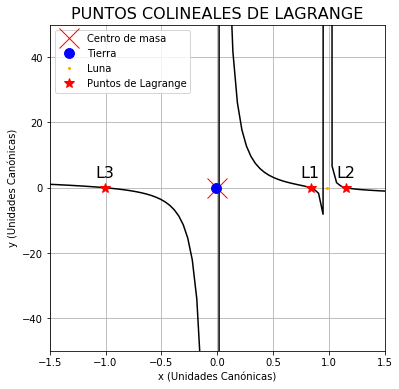

In [ ]:
xs=np.linspace(-2,2,100)
plt.figure(figsize=(6,6))
plt.plot(xs,lagrangePoints(xs,alpha),'k-')
plt.plot(0,0,"rx",markersize=20*(1-alpha),label="Centro de masa")
plt.plot(-alpha,[0],'o',color='blue',markersize=10*(1-alpha),label="Tierra")
plt.plot([1-alpha],[0],'o',color='orange',markersize=max(2,10*alpha),label="Luna")
#Graficando los puntos de Lagrange
plt.annotate(r'L1',
            xy=(L1x,0 ), xycoords='data',
            xytext=(-10, +10), textcoords='offset points', fontsize=16)
            #arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.plot([L1x],[0],'r*',markersize=10,label="Puntos de Lagrange")
plt.annotate(r'L2',
            xy=(L2x,0 ), xycoords='data',
            xytext=(-10, +10), textcoords='offset points', fontsize=16)
plt.plot([L2x],[0],'r*',markersize=10)
plt.annotate(r'L3',
            xy=(L3x,0 ), xycoords='data',
            xytext=(-10, +10), textcoords='offset points', fontsize=16)
plt.plot([L3x],[0],'r*',markersize=10)
plt.title("PUNTOS COLINEALES DE LAGRANGE",fontsize=16)
plt.xlabel("x (Unidades Canónicas)")
plt.ylabel("y (Unidades Canónicas)")
plt.xlim(-1.5,1.5)
plt.ylim(-50,50)
plt.grid()
plt.legend()

Para llevar una nave a la Luna, es necesario examinar el siguiente gráfico del (CRTBP) donde se muestran curvas de cero velocidad, para diferentes valores de la Constante de Jacobi

<a href="https://ibb.co/7kMmtr8"><img src="https://i.ibb.co/sWxY9sk/Captura.png" alt="Captura" border="0"></a>

Estas curvas se pueden interpretar como las regiones donde se puede mover el cuerpo $m_3$, se puede observar que en la curva azul, esta delimitando la region entre los dos cuerpos $m_1$ y $m_2$, en cuya intersección se encunetra el punto de Lagrnge $L_1$,al cual corresponde a un valor de la cosntante de Jacobi. 

$$
C_J=-\vec{v}^{2}+\frac{2\left(1-\alpha\right)}{r_{1}}+\frac{2\alpha}{r_{2}}+x^{2}+y^{2}\qquad(1).
$$

En este caso  que si desea que la partícula $m_3$ orbite unicamente la tierra, se debe hallar una velocidad $v_0$ de tal modo que la Constante de Jacobi este definiendo la region azul, si se quiere que la particula pase a la region roja, se debe incrementar la velocidad, y esta eventualmente pasara a órbitar la Luna.
Para encontrar el $C_j$ correspondiente a la curva Azul, Es necesario ubicarnos en el punto de Lagrange $L_1$, ya que si la nave llega a este punto, esta estaria en reposo (Desde el sistema rotatante), solo seria necesario incrementar un poco la velocidad para que esta pase a la region roja. 
Como ya conocemos el valor de $L_1$ es posible encontrar el valor de la constante asociada, usando la siguiente expresión
$$
C_J=\frac{2\left(1-\alpha\right)}{x_{L_{1}}+\alpha}+\frac{2\alpha}{1-\alpha-x_{L_{1}}}+x_{L_{1}}^{2}=3.18832\qquad(2).
$$
Teniendo este valor de $C_j$ despejamos la Velocidad dela ecuacion (1) y tenemos la velocidad min que necesita una particula para llegar a $L_1$
$$
\boxed{v_{min}=\sqrt{-C_{J}+\frac{2\left(1-\alpha\right)}{a}+2\alpha+x^{2}+y^{2}}.\qquad(3)}
$$


In [ ]:
#fUNCION QUE CALCULA EL VALOR DE LA CONSTANTE DE JACOBI PARA L1,L2,L3
def JacobiConstant(L,v,alpha):
    r1=-alpha
    r2=1-alpha
    omega=1
    R1=abs(L-r1)
    R2=abs(L-r2)
    C=2*(1-alpha)/(R1)+2*alpha/(R2)+(L**2)-(v)**2
    return C
#Valores de la constante de Jacobi
Cj1=JacobiConstant(L1x,0,alpha)# constante de Jacobi para L1
Cj2=JacobiConstant(L2x,0,alpha)# constante de Jacobi para L2
Cj3=JacobiConstant(L3x,0,alpha) # constante de Jacobi para L3
print("los puntos de Lagrange L1 & L2 L3, Tienen como constante de Jacbi a","%.4f"%Cj1,"%.4f"%Cj2,"%.4f"% Cj3,"respectivamente")

los puntos de Lagrange L1 & L2 L3, Tienen como constante de Jacbi a 3.1883 3.1721 3.0121 respectivamente


In [ ]:
#Constane de Jacobi asociada a L1

Cj=JacobiConstant(L1x,0,alpha)
"""
Calculo de la velocidad Minima para que la partícula se mueva  unicamente en la region azul
""" 
def Velocidadminima(x,y,Cj):
  return np.sqrt(-Cj+2*(1-alpha)/a+x**2+y**2+2*alpha)

x=6400e3/Ul -alpha #Posicón de lanzamiento de la nave sobre la superficie de la tierra
y=0
a=6400e3/Ul

V_min=Velocidadminima(x,y,Cj) #velocidad minima 
v= Velocidadminima(x,y,Cj)*(Ul/Ut)/1000 #velocidad 




print("La constante de Jacobi para  L1 =%.4f  "%L1x," es =%.4f m/s"%Cj)
print("La velocidad minima es para mantenerce en la región azul es  %.4f Ul/Ut "%V_min,"%.4f m/s"%v)
print("La posición de lanzamiento de la partícula es  %.4f Ul "%x)


La constante de Jacobi para  L1 =0.8370    es =3.1883 m/s
La velocidad minima es para mantenerce en la región azul es  11.6513 Ul/Ut  11.0366 m/s
La posición de lanzamiento de la partícula es  0.0021 Ul 


La constante de Jacobi para para $L_1$ es $3.1882$, por tanto una particula para llegar a $L_1$ Necesita una velocidad minima de $11.037\mbox{m}/\mbox{s}^2$

#Objeto orbitando unicamente la Tierra
Para que la partícula órbite  unicamente la tierra es necesario una velocidad menor a $v_{min}=11.2\, U_l/U_t=11.65\, \mbox{km}/\mbox{s}$ y mayor a $v_{esc}=11,186\, \mbox{km}/\mbox{s}$ que es la velocidad de escape de la tierra.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/DkcDJJq/descarga-2.png" alt="descarga-2" border="0"></a><br /><a target='_blank' href='https://es.imgbb.com/'>


Objeto orbitando el sistema Tierra-Luna
Para que orbite ambos cuerpos es necesario dotar al el zatélite de un velocidad mayor a  $v=11,65Km/s$  aunque no demasiada porque no se desea que alcanse una velocidad que la pueda sacar de la region roja

<a href="https://imgbb.com/"><img src="https://i.ibb.co/M7SrkSF/descarga-3.png" alt="descarga-3" border="0"></a>

Si se desea que el satelite se quede orbitando la luna, es necesario que la partícula este en la región cercana a la Luna, y una vez ahí bajar la velocidad de modo que el movimiento de la partícula vuelva a estar delimitada por la curva azul
<a href="https://imgbb.com/"><img src="https://i.ibb.co/kxRhfn1/descarga-4.png" alt="descarga-4" border="0"></a>

**6. Posición del planeta Neptuno.** Prediga el vector de posición (respecto a la eclíptica) del planeta Neptuno para el día 14 octubre de 2019 a las 00:00:00 UT. Calcule el error relativo porcentual de sus resultados con aquellos entregados por el sistema HORIZONS de NASA, que para ese momento particular son:
\begin{eqnarray}
x_{ecliptica} &=& +2,919007594264247 × 10^{+1} AU\\
y_{ecliptica} &=& −6,610890476412660 × 10^{00} AU\\
z_{ecliptica} &=& −5,366637740198267 × 10^{−1} AU
\end{eqnarray}

In [ ]:
#Angulos de euler 

i = 50*np.pi/180.0 #rad Inclinación del plano
W = 0.0*np.pi/180.0 #Omega rad Angulo de los nodos 
w =30*np.pi/180.0 #rad
f = 20*np.pi/180.0 #rad Anomalia verdadera
a = 8016.0#km Semiejemayor
e = 0.06 #excentricidad
# Radio Vector
r=a*(1-e**2)/(1+e*np.cos(f))
##Matriz de transformación del Sistema 
X=r*np.cos(f)*(np.cos(W)*np.cos(w) - np.sin(W)*np.sin(w)*np.cos(i)) - r*sin(f)*(np.cos(W)*np.sin(w)+np.sin(W)*np.cos(i)*np.cos(w))
Y= r*np.cos(f)*(np.sin(W)*np.cos(w)+ np.cos(W)*np.cos(i)*np.sin(w))+ r*np.sin(f)*(-np.sin(W)*np.sin(w)+ np.cos(W)*np.cos(i)*np.cos(w))
Z= r*np.cos(f)*np.sin(i)*np.sin(w) + r*np.sin(f)*np.sin(i)*np.cos(w)

print(" el vector de posición en el sistema del ecuador terrestre es (",np.round(X,3),np.round(Y,3),np.round(Z,3), ") km y su magnitud es ",np.round(r,3),"km" )

 el vector de posición en el sistema del ecuador terrestre es ( 4860.021 3722.992 4436.889 ) km y su magnitud es  7560.85 km


In [ ]:
a = 8016.
e = 0.06
f = 20*GRADOS

r = a*(1-e*e)/(1+e*np.cos(f))
xppp = r*np.cos(f)
yppp = r*np.sin(f)
zppp = 0
rppp=np.array([[xppp], [yppp], [zppp]])
print('El vector posición en el plano orbital es, en km,\n',rppp)

In [ ]:
i = 50*GRADOS
Omega = 0*GRADOS
omega = 30*DEG

R3d=spy.eul2m(omega,i,Omega,3,1,3)
R3d

In [ ]:
R3D = np.transpose(R3d) 
R3D

In [ ]:
R3D.dot(rppp)

**Parámetro de Tisserand para familias de cometas.** Dependiendo de propiedades como el periodo orbital $(P)$ y la distancia al perihelio $(q)$, los cometas son agrupados en distintas familias. Estadísticamente se ha observado que los miembros de estas familias poseen parámetros de Tisserand relativos a Júpiter $(T_J )$ bastante característicos y acotados. Así, los cometas que tienen $P < 20 años$ y $q < 2AU$ (cometas de periodo corto) presentan un parámetro de Tisserand entre $2 < T_J < 3$, los cometas de la familia de Júpiter con $ P < 20años$ y $2 < q < 5AU$ tienen $2,5 < T_J < 3$ y los de tipo Halley con $20 < P < 200 años$ (cometas de periodo largo) poseen $T_J < 2$. Demuestre estas cotas para $T_J$ seleccionando un cometa de cada familia y calculando su parámetro de Tisserand $T_J$ . Recuerde que los datos orbitales necesarios los puede encontrar en http://ssd.jpl.nasa.gov/sbdb.cgi#top.

**Parametro de Tiserrand**
\begin{equation}
\boxed{\displaystyle T_P=\frac{1}{a} + 2\sqrt{a(1-e^2)}\cos I}
\end{equation}


Considerando el corolario de Newton podemos encontrar el semieje mayor de estos cometas.

$$\eta^2a^3={G}(m_{\odot}+m_{j})$$
$$a=\left(G(m_{\odot}+m_{j})\frac{P^2}{4\pi^2}\right)^\frac{1}{3}$$,
donde $m_{\odot}$ es la masa del Sol y $m_j $ es la masa de Júpiter.

En unidades canónicas se tiene
$$a=\left(\frac{(P/UT)^2}{4\pi^2}\right)^\frac{1}{3}$$

In [ ]:
#Constantes del problema
G=6.67e-11
ms=1.98e30  # (kg) masa del sol
mj=1.898e27 # (kg)masa de jupyter
mc=2.2e14 # (kg) masa del cometa
r=778.5e9 # (m) distancia de Jípiter al Sol 
Mu=G*(ms+mj) # mu
T=12*365.25*86400 #periodo de Júpiter en segundos

e=0 #excentricidad

# Esfera de Actividad
#R=r*(m/M)**(2/5)
#R/1.5e11

#Unidades Caónicas
UL=r
UM=ms+mj
UT=sqrt(UL**3/(G*UM))
UV=UL/UT
#Cantidades en unidades Canónicas
M=ms/UM #masa del sol en unidades canónicas
m=mj/UM #masa de Júpiter en unidades canónicas
mc=mc/UM
a=r/UL# distaancia de jupiter en unidades canónicas





0.15776081658883165

In [ ]:
def ParametroTp(P,I,e):
  P=P/UT
  a=(1.0*(P**2/(4*np.pi**2)))**(1/3)
  return 1/a +2*np.sqrt(a*(1-e**2))*np.cos(I)
def ColoralioNewton(P,M):
  return (G*(M)*(P**2/(4*np.pi**2)))**(1/3)
Nt=20
I=np.linspace(0,np.pi/6,Nt)#Bajas inclinaciones Grados
#plt.plot(I,cos(I))

**Cometas de Periodo corto**
estos cometas poseen periodos que van desde $10\leq P\leq20 \mbox{años}$, estos se calculan tomando una excentricidad de 0.5 ya que es una excentricidad promedio cuando se trata de cometas, ademas la excentricidad no influye significativamente en la clasificación que se pretende realizar. La inclinación de la órbita se tomo de $0$ a $30$ grados, ya que en este intervalo se encierran la mayoria de las inclinaciones de los cometas

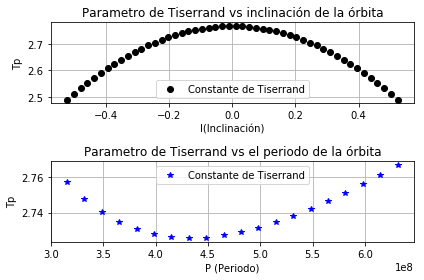

In [ ]:
Ps=20*(365.25*86400) # periodo que es la cota suerior 20 años
Pi=10*(365.25*86400)# periodo que es la cota inferior 10 años
P=np.linspace(Pi,Ps,Nt)#Bajas inclinaciones Grados
plt.subplot(211)
#plt.plot(I, ParametroTp(Ps,I,e=0.5))
plt.plot(I,ParametroTp(Ps,I,e=0.5),"ok",label="Constante de Tiserrand")
plt.title("Parametro de Tiserrand vs la inclinación de la órbita")
plt.xlabel("I(Inclinación)")
plt.ylabel("Tp")
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(P, ParametroTp(P,I=0,e=0.5),"*b",label="Constante de Tiserrand")
plt.title("Parametro de Tiserrand vs el periodo de la órbita")
plt.xlabel("P (Periodo)")
plt.ylabel("Tp")
plt.legend()
plt.grid()
plt.tight_layout()

El parametro de Tiserrand para estos cometas esta acotado por $2\leq Tp\leq 3$, entre estos estan los cometas los cometas de la familia de Júpiter con $ P < 20años$ y $2 < q < 5AU$ los cuales tienen parametros de Tiserrand asociados a Jpiter de $2,5 < T_J < 3$.

**Cometas de Periodo Largo**
$20 < P < 200 años$ (cometas de periodo largo) poseen $T_J < 2$

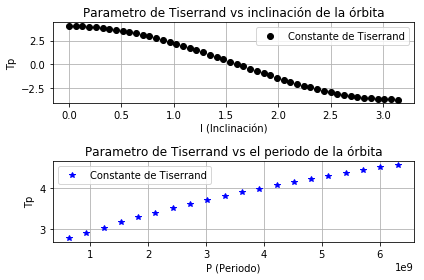

In [ ]:
I=np.linspace(0,np.pi)
Ps=200*(365.25*86400) # periodo que es la cota suerior 200 años
Pi=20*(365.25*86400)# periodo que es la cota inferior 20 años
P=np.linspace(Pi,Ps,Nt)#Bajas inclinaciones Grados
plt.subplot(211)
plt.plot(I,ParametroTp(Ps,I,e=0.65),"ok",label="Constante de Tiserrand")
plt.title("Parametro de Tiserrand vs inclinación de la órbita")
plt.xlabel("I (Inclinación)")
plt.ylabel("Tp")
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(P, ParametroTp(P,I=0,e=0.5),"*b",label="Constante de Tiserrand")
plt.title("Parametro de Tiserrand vs el periodo de la órbita")
plt.xlabel("P (Periodo)")
plt.ylabel("Tp")
plt.legend()
plt.grid()
plt.tight_layout()

Extrayendo los datos órbitales de la pagina[JPL](https://ssd.jpl.nasa.gov/sbdb.cgi#top) 
del cometa **19P/Borrelly** que es de periodo corto,Se puede comprobar las cotas antes mencionadas.

\begin{eqnarray}
e	=&.6232892711821078\\	 
a=&	3.609665546424225	&	au\\
q=&	1.359799738782305	&	au\\
i=&	30.31307021679391	&deg\\
tp=& 2452166.75363030\\
T=&6.86 & años
\end{eqnarray}
Donde este tiene un parametro de tiserrand de $T_p=2.02$, lo que concuerda con los limites antes establecidos


In [ ]:
# Elementos orbitales del cometa Borrelly

IB=30.31307021679391
PB=6.863*(365.25*86400)
eB=.6232892711821078
aB=3.609665546424225*1.5e11
T_Borrelly=ParametroTp(PB,IB,eB)
print("El parametro de Tiserrand del cometa Borrellyes %4.f "%T_Borrelly)
T_Borrelly

El parametro de Tiserrand del cometa Borrellyes    2 


2.030154991240164

Para cometas de periodo largo se tomo los datos del cometa 1/P halley que tiene los siguientes elementos orbitales
\begin{align}
e=&	0.967142908462304 \\
a=&	17.8341442925537	&au\\
q=&	0.585978111516909	&	au\\
i=&	162.262690579161	&	deg\\
tp=&	2446467.395317050925\\
T=& 75.32
\end{align}

In [ ]:
#Elementos orbitales del cometa Halley
IH=162.262690579161
PH=75.32*(365.25*86400)
eH=0.967142908462304
aH=17.8341442925537*1.5e11
T_H=ParametroTp(PB,IH,eH)
print("El parametro de Tiserrand del cometa Hayakutaake es %4.f "%T_H)
T_H

El parametro de Tiserrand del cometa Hayakutaake es    2 


1.6348407349098322

**8. Puntos colineales de Lagrange .**
Calcule num ́ericamente la ubicación de los
tres puntos colineales de Lagrange para un valor de α = 0,3 resolviendo la ecuación.

\begin{equation}
\boxed{\displaystyle x - (1-\alpha)\frac{(x-x_1)}{|x - x_1|^3} - \alpha \frac{(x - x_2)}{|x - x_2|^3} = 0}
\end{equation}


In [ ]:
#Datos iniciales
alpha1=0.3
#Usa la rutina de puntos de lagrange definida en celdas anteriores
L1x=bisect(lagrangePoints,0,1-alpha1-alpha1/10,args=(alpha1,))#punto de lagrange L1
L2x=bisect(lagrangePoints,(1-alpha1)+alpha1/2,2,args=(alpha1,))#punto de lagrange L2
L3x=bisect(lagrangePoints,-2,-alpha1-alpha1/2,args=(alpha1,))#punto de lagrange L3

print("los puntos de lagrange para alpha= 0.3 son L1:","%.4f"%L1x,"L2:","%.4f"%L2x,"L3:","%.4f"%L3x)

los puntos de lagrange para alpha: 0.3 son L1: 0.2861 L2: 1.2567 L3: -1.1232


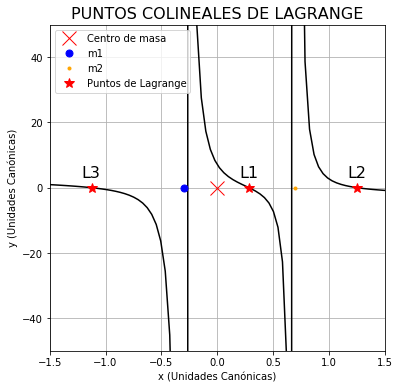

In [ ]:
xs=np.linspace(-2,2,100)
plt.figure(figsize=(6,6))
plt.plot(xs,lagrangePoints(xs,alpha1),'k-')
plt.plot(0,0,"rx",markersize=20*(1-alpha1),label="Centro de masa")
plt.plot(-alpha1,[0],'o',color='blue',markersize=10*(1-alpha1),label="m1")
plt.plot([1-alpha1],[0],'o',color='orange',markersize=max(2,10*alpha1),label="m2")
#Graficando los puntos de Lagrange
plt.annotate(r'L1',
            xy=(L1x,0 ), xycoords='data',
            xytext=(-10, +10), textcoords='offset points', fontsize=16)
            #arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.plot([L1x],[0],'r*',markersize=10,label="Puntos de Lagrange")
plt.annotate(r'L2',
            xy=(L2x,0 ), xycoords='data',
            xytext=(-10, +10), textcoords='offset points', fontsize=16)
plt.plot([L2x],[0],'r*',markersize=10)
plt.annotate(r'L3',
            xy=(L3x,0 ), xycoords='data',
            xytext=(-10, +10), textcoords='offset points', fontsize=16)
plt.plot([L3x],[0],'r*',markersize=10)
plt.title("PUNTOS COLINEALES DE LAGRANGE",fontsize=16)
plt.xlabel("x (Unidades Canónicas)")
plt.ylabel("y (Unidades Canónicas)")
plt.xlim(-1.5,1.5)
plt.ylim(-50,50)
plt.grid()
plt.legend()